In [39]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc, recall_score, precision_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

%matplotlib inline

In [40]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/us_tornado_dataset_1950_2021.csv")

data.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [41]:
# Dizionario di mapping per le colonne
column_mapping = {
    'yr': 'Year',
    'mn': 'Month',
    'dy': 'Day',
    'date': 'Date',
    'st': 'State',
    'mag': 'Rating',
    'inj': 'Injuries',
    'fat': 'Fatalities',
    'slat': 'Start_Latitude',
    'slon': 'Start_Longitude',
    'elat': 'End_Latitude',
    'elon': 'End_Longitude',
    'len': 'Track_Length',
    'wid': 'Track_Width'
}

# Rinominare le colonne
data = data.rename(columns=column_mapping)

# Verifica delle nuove colonne
print(data.head())


   Year  mo  Day        Date State  Rating  Injuries  Fatalities  \
0  1950   1    3  1950-01-03    IL       3         3           0   
1  1950   1    3  1950-01-03    MO       3         3           0   
2  1950   1    3  1950-01-03    OH       1         1           0   
3  1950   1   13  1950-01-13    AR       3         1           1   
4  1950   1   25  1950-01-25    IL       2         0           0   

   Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Track_Length  \
0           39.10           -89.30         39.12         -89.23           3.6   
1           38.77           -90.22         38.83         -90.03           9.5   
2           40.88           -84.58          0.00           0.00           0.1   
3           34.40           -94.37          0.00           0.00           0.6   
4           41.17           -87.33          0.00           0.00           0.1   

   Track_Width  
0          130  
1          150  
2           10  
3           17  
4          100  


In [42]:
data.columns

Index(['Year', 'mo', 'Day', 'Date', 'State', 'Rating', 'Injuries',
       'Fatalities', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'Track_Length', 'Track_Width'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             67558 non-null  int64  
 1   mo               67558 non-null  int64  
 2   Day              67558 non-null  int64  
 3   Date             67558 non-null  object 
 4   State            67558 non-null  object 
 5   Rating           67558 non-null  int64  
 6   Injuries         67558 non-null  int64  
 7   Fatalities       67558 non-null  int64  
 8   Start_Latitude   67558 non-null  float64
 9   Start_Longitude  67558 non-null  float64
 10  End_Latitude     67558 non-null  float64
 11  End_Longitude    67558 non-null  float64
 12  Track_Length     67558 non-null  float64
 13  Track_Width      67558 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.2+ MB


In [44]:
# Rimuovere la colonna 'Date' dal dataframe
data = data.drop(columns=['Date', 'State', 'Year', 'mo', 'Day'])

# Controllare se la colonna è stata rimossa
print(data.head())

   Rating  Injuries  Fatalities  Start_Latitude  Start_Longitude  \
0       3         3           0           39.10           -89.30   
1       3         3           0           38.77           -90.22   
2       1         1           0           40.88           -84.58   
3       3         1           1           34.40           -94.37   
4       2         0           0           41.17           -87.33   

   End_Latitude  End_Longitude  Track_Length  Track_Width  
0         39.12         -89.23           3.6          130  
1         38.83         -90.03           9.5          150  
2          0.00           0.00           0.1           10  
3          0.00           0.00           0.6           17  
4          0.00           0.00           0.1          100  


In [45]:
data.duplicated().sum()
data.drop_duplicates()

,Rating,Injuries,Fatalities,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Track_Length,Track_Width
0,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...
67553,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150


In [46]:
data.isnull().sum()

Rating             0
Injuries           0
Fatalities         0
Start_Latitude     0
Start_Longitude    0
End_Latitude       0
End_Longitude      0
Track_Length       0
Track_Width        0
dtype: int64

In [47]:
# Create dummies - for better model outcomes
data = pd.get_dummies(data)
data.head()

,Rating,Injuries,Fatalities,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Track_Length,Track_Width
0,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[[ 'Track_Length', 'Injuries', 'Fatalities','Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude' ]] = \
    scaler.fit_transform(data[[ 'Track_Length', 'Injuries', 'Fatalities','Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude']])
data.head()

,Rating,Injuries,Fatalities,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Track_Length,Track_Width
0,3,0.001724,0.000000,0.493750,0.751203,0.641101,0.454351,0.015339,130
1,3,0.001724,0.000000,0.486129,0.741892,0.636349,0.449459,0.040477,150
2,1,0.000575,0.000000,0.534860,0.798969,0.000000,1.000000,0.000426,10
3,3,0.000575,0.006329,0.385202,0.699894,0.000000,1.000000,0.002556,17
4,2,0.000000,0.000000,0.541558,0.771139,0.000000,1.000000,0.000426,100


In [49]:
data.describe()

,Rating,Injuries,Fatalities,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Track_Length,Track_Width
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,0.691273,0.000826,0.000573,0.448539,0.715938,0.372512,0.656053,0.014820,106.577030
std,1.283375,0.010497,0.009393,0.117647,0.087933,0.304632,0.278170,0.035274,205.802676
min,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357950,0.658605,0.000000,0.420841,0.000426,20.000000
50%,1.000000,0.000000,0.000000,0.445943,0.707687,0.532284,0.483764,0.003409,50.000000
75%,1.000000,0.000000,0.000000,0.536015,0.777211,0.632743,1.000000,0.013336,100.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4576.000000


In [50]:

## Crea la colonna HighImpact che indica se il Rating è maggiore o uguale a 2 E Track_Width > 50
data['HighImpact'] = ((data['Rating'] > 1) | (data['Track_Width'] >= 55)).astype(int)

# Assegna la colonna HighImpact come variabile target (y)
y = data['HighImpact']
x = data.drop(columns=['HighImpact'])  # Assicurati di rimuovere la colonna target dal set di dati di input

# Verifica la distribuzione delle classi in HighImpact
print("Distribuzione delle classi in HighImpact:")
print(data['HighImpact'].value_counts())

# Class balance
ld = data[data['HighImpact'] == 1]  # Danger (1)
no_ld = data[data['HighImpact'] == 0]  # NOT Danger (0)
print("Danger: ", len(ld), " NOT Danger: ", len(no_ld))





Distribuzione delle classi in HighImpact:
HighImpact
0    38465
1    29093
Name: count, dtype: int64
Danger:  29093  NOT Danger:  38465


In [51]:
balanced_d = pd.concat([ld, no_ld.sample(len(ld))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(58186, 10)

In [52]:
print(data['HighImpact'].value_counts())


HighImpact
0    38465
1    29093
Name: count, dtype: int64


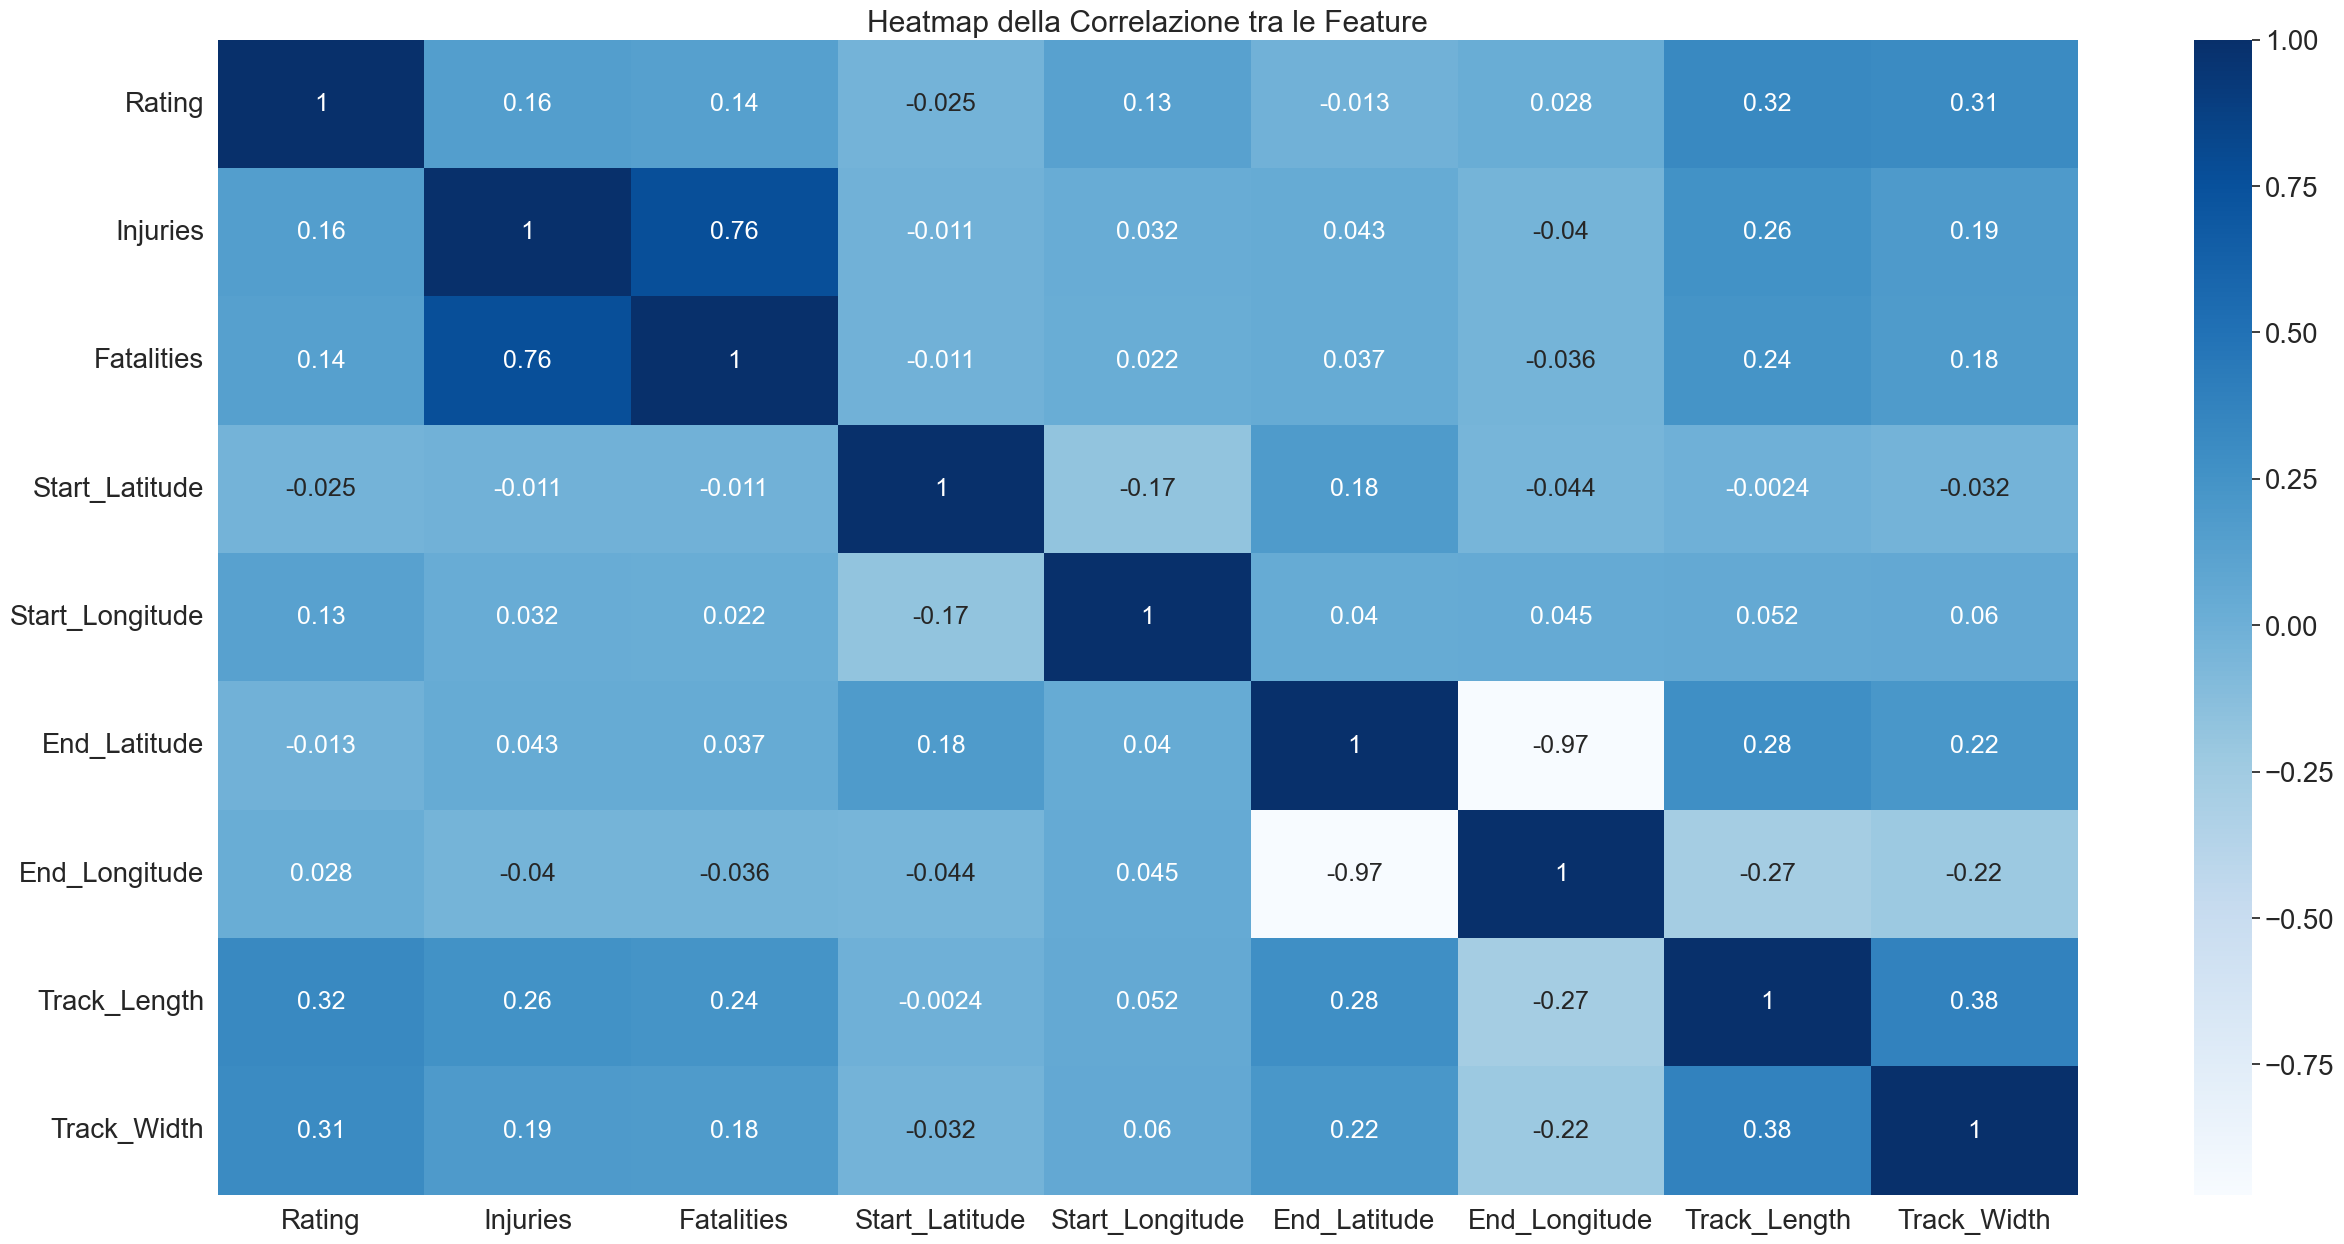

In [53]:
# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcolare e visualizzare la matrice di correlazione
plt.figure(figsize=(30, 15))
sns.heatmap(numeric_data.corr(), cmap="Blues", annot=True, annot_kws={"size": 18})

# Aggiungere il titolo
plt.title("Heatmap della Correlazione tra le Feature")
plt.show()


In [54]:
# Drop values to avoid variables with too high correlation
x = x.drop(['Injuries', 'Fatalities', 'Track_Length', 'Track_Width'], axis=1)

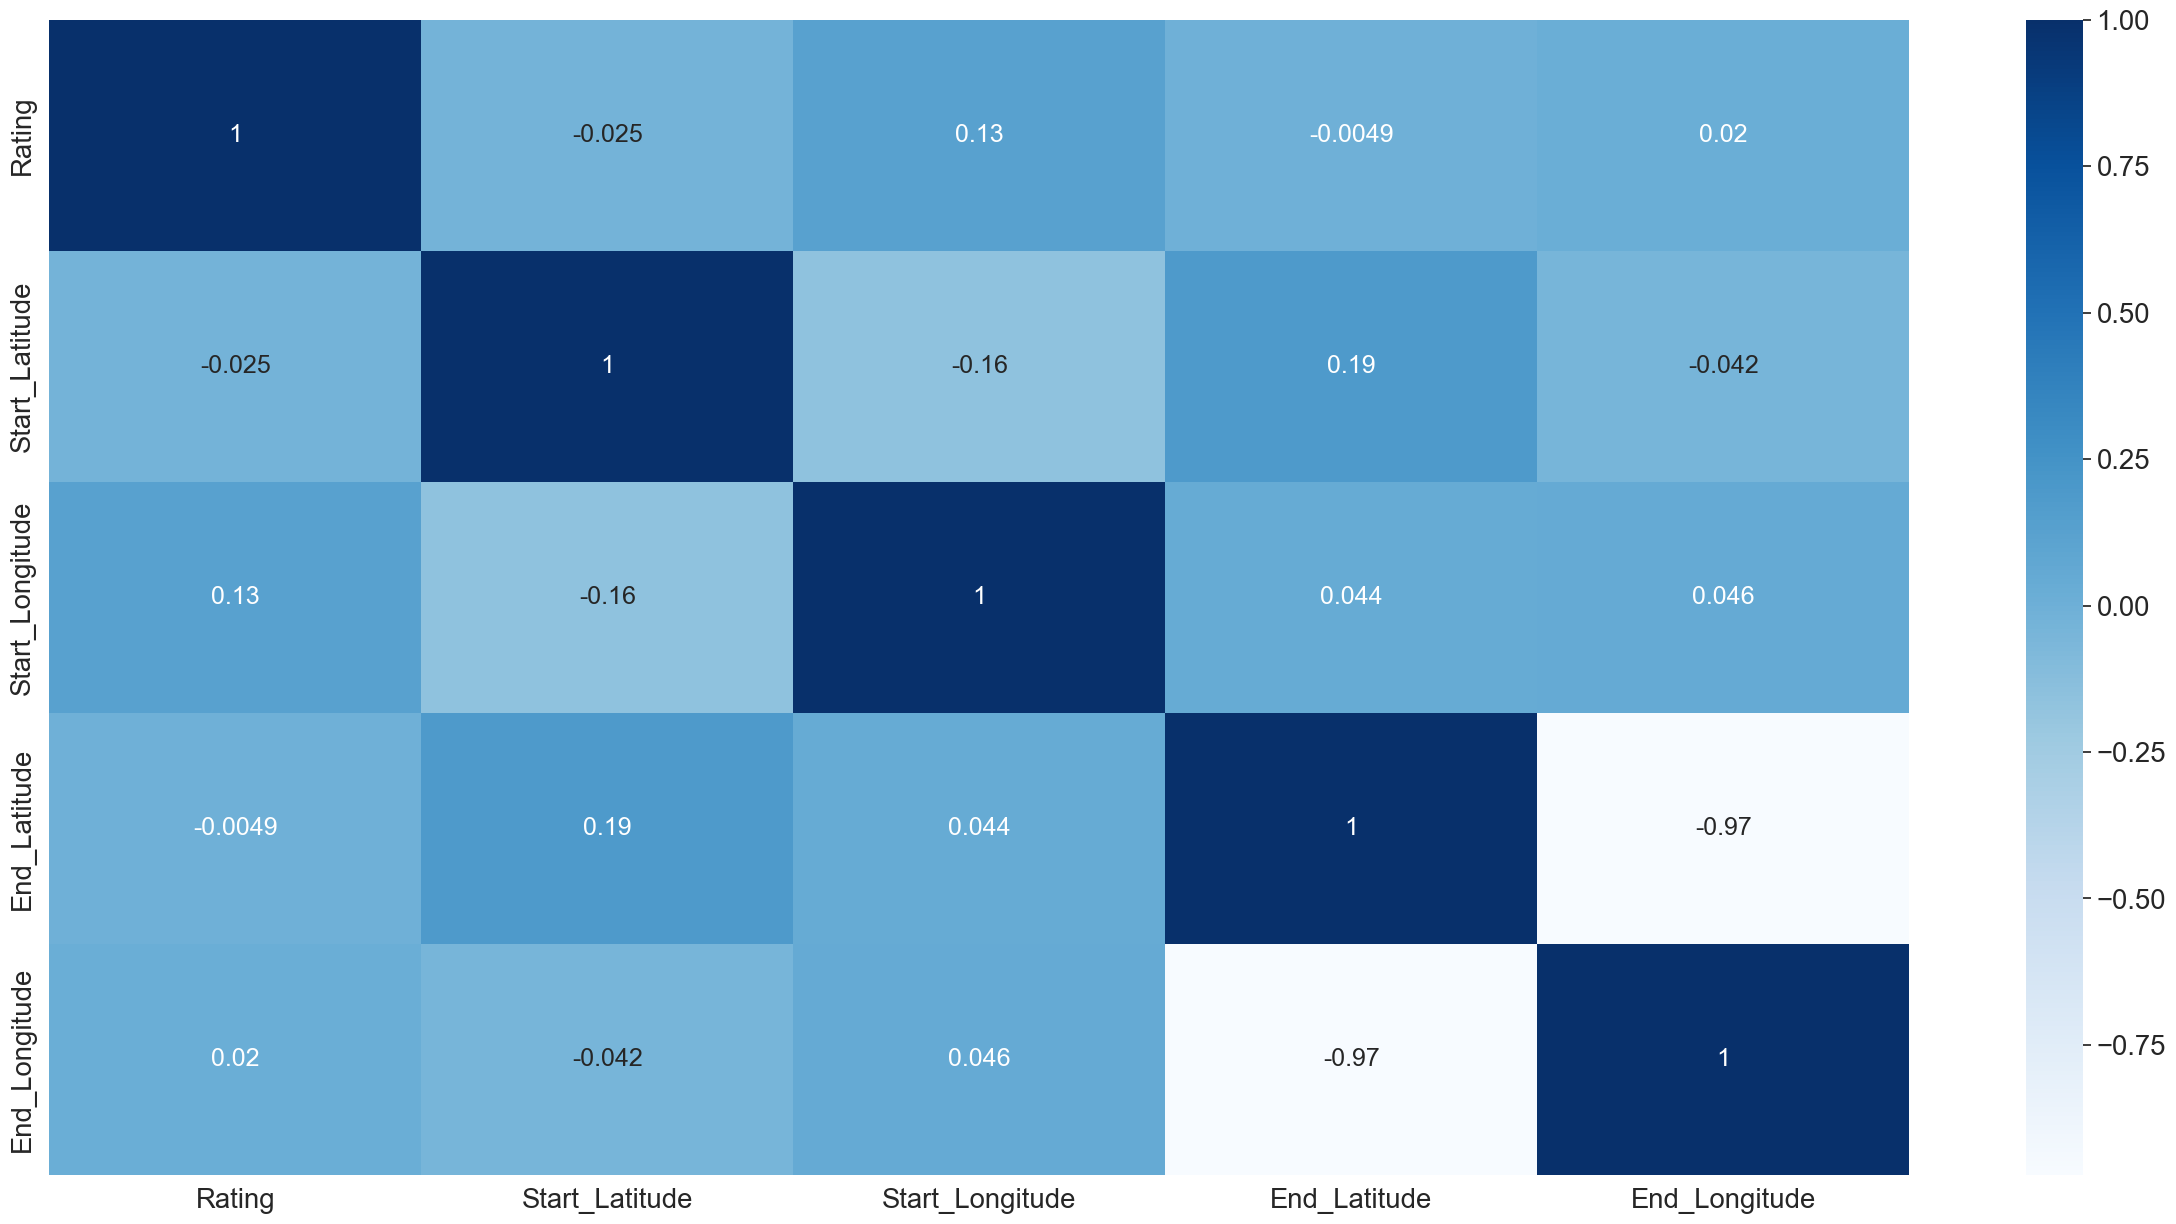

In [55]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [56]:
print(x.shape)
print(y.shape)


(58186, 5)
(58186, 1)


In [57]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(46548, 5)
(11638, 5)
(46548, 1)
(11638, 1)


In [58]:
# Verifica la distribuzione delle classi nel set di test
print("Distribuzione delle classi nel set di test:")
print(y_test.value_counts())


Distribuzione delle classi nel set di test:
HighImpact
0             5868
1             5770
Name: count, dtype: int64


In [59]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [60]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())
    


Accuracy: 0.81 	 ---> LogisticRegression 
Accuracy: 0.75 	 ---> DecisionTreeClassifier 
Accuracy: 0.79 	 ---> RandomForestClassifier 
Accuracy: 0.81 	 ---> GradientBoostingClassifier 
Accuracy: 0.81 	 ---> AdaBoostClassifier 
Accuracy: 0.79 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.81 	 ---> SVC 


In [61]:
# Stampa la lunghezza delle liste per assicurarti che siano uguali
print("Length of cv_acc:", len(cv_acc))
print("Length of cv_std:", len(cv_std))
print("Length of clf_name:", len(clf_name))


Length of cv_acc: 7
Length of cv_std: 7
Length of clf_name: 7


In [62]:
import pandas as pd

# Verifica che cv_results sia un DataFrame
print(type(cv_results))

# Se non è un DataFrame, convertilo in uno
if not isinstance(cv_results, pd.DataFrame):
    cv_results = pd.DataFrame(cv_results)


<class 'list'>


In [64]:
cv_results_df = pd.DataFrame(cv_results) # Supponendo che cv_results sia una lista di dizionari


In [65]:
cv_results_df = pd.DataFrame(cv_results, columns=["Algorithm", "CrossValMeans"])  # Rinomina le colonne se necessario


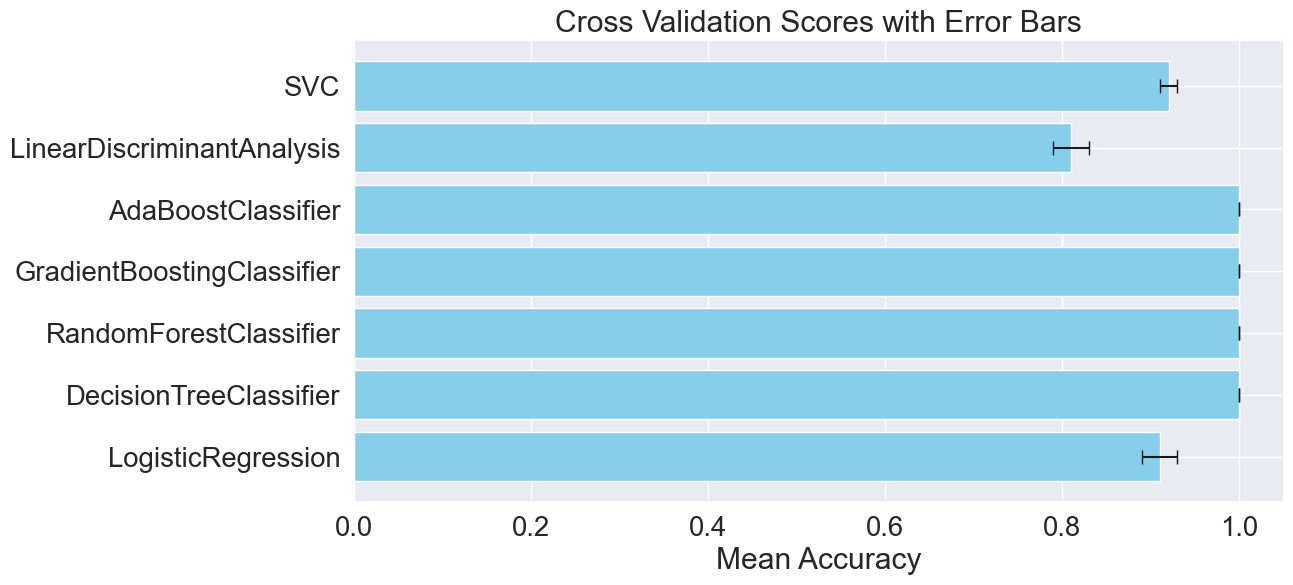

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Dati delle metriche
cv_acc = [0.91, 1.0, 1.0, 1.0, 1.0, 0.81, 0.92]  # Accuracies
cv_std = [0.02, 0.0, 0.0, 0.0, 0.0, 0.02, 0.01]  # Standard deviations
clf_name = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 
            'GradientBoostingClassifier', 'AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'SVC']

# Creazione del DataFrame
cv_res = pd.DataFrame({"CrossValMeans": cv_acc, "CrossValerrors": cv_std, "Algorithm": clf_name})

# Creiamo un grafico a barre orizzontali con le barre di errore manuali
plt.figure(figsize=(12, 6))
plt.barh(cv_res['Algorithm'], cv_res['CrossValMeans'], xerr=cv_res['CrossValerrors'], capsize=5, color="skyblue")

# Etichette e titolo
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores with Error Bars")
plt.show()


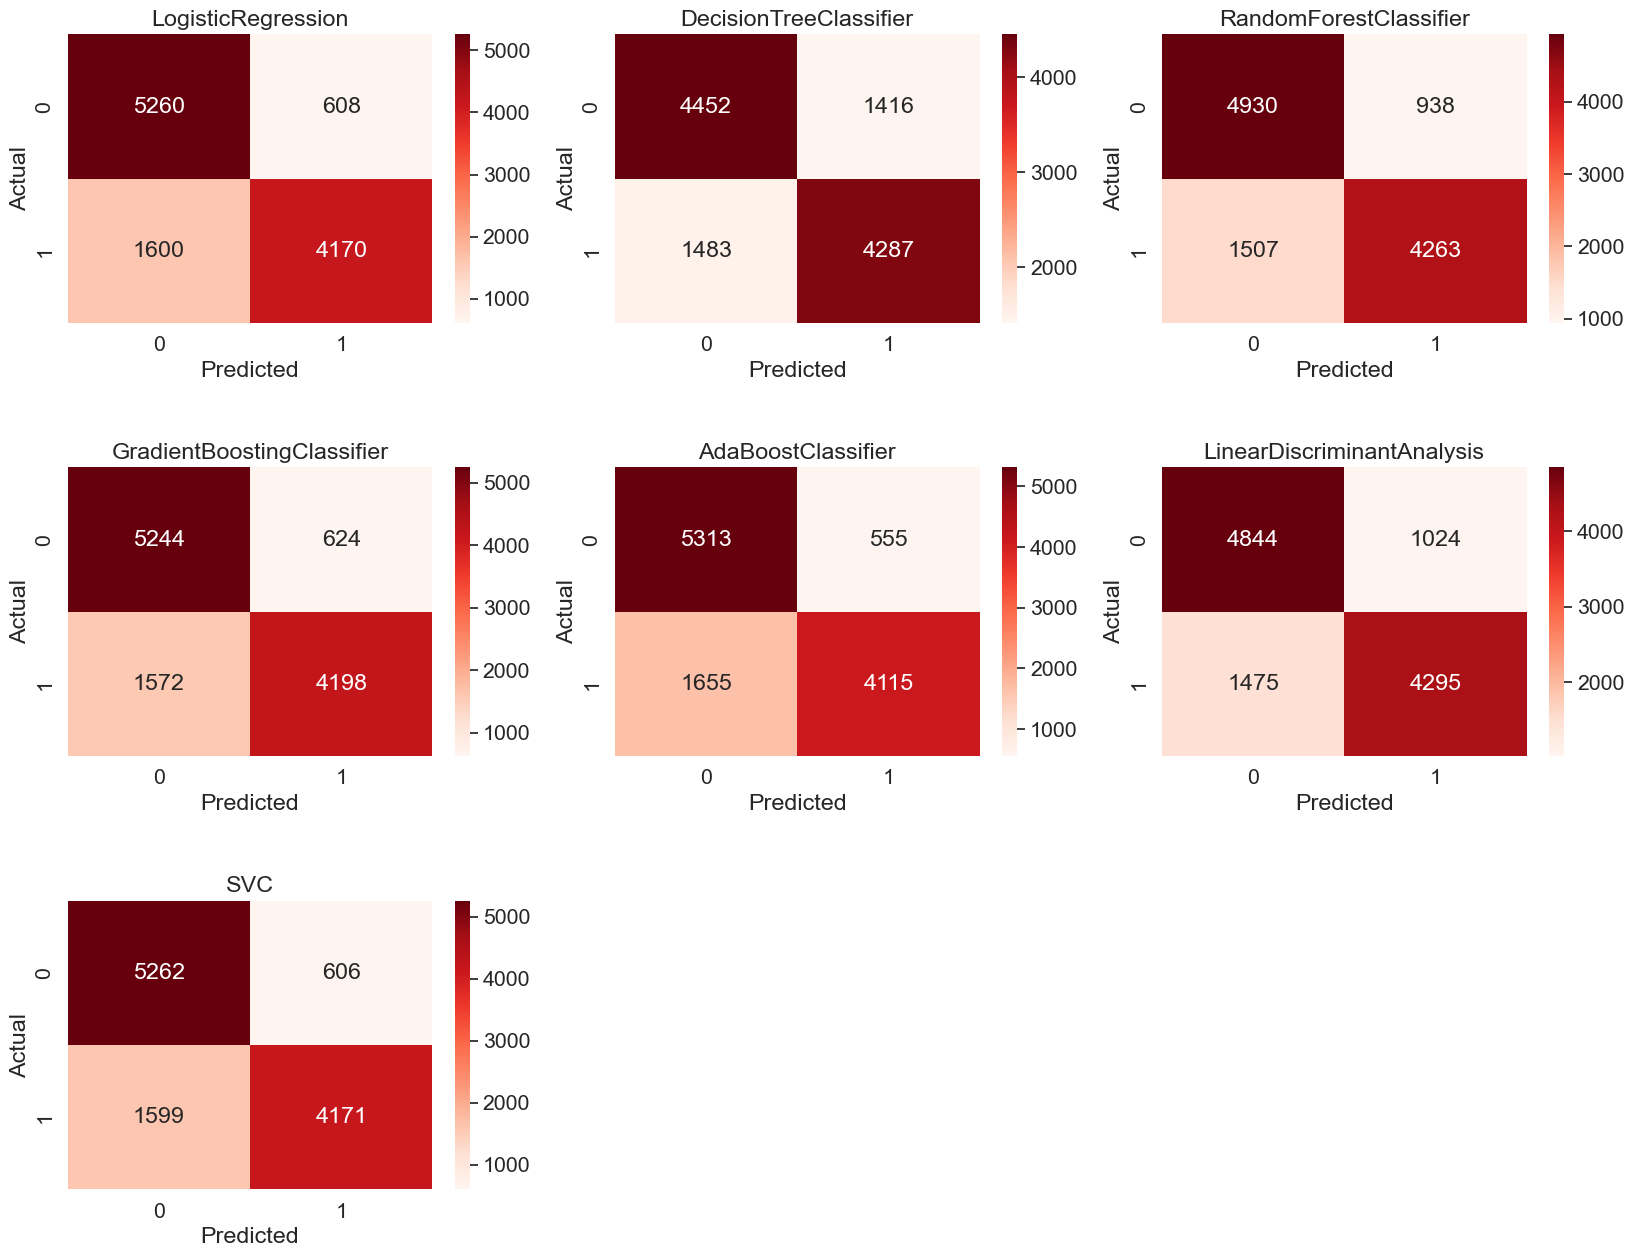

In [67]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [68]:

#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5868
           1       0.87      0.72      0.79      5770

    accuracy                           0.81     11638
   macro avg       0.82      0.81      0.81     11638
weighted avg       0.82      0.81      0.81     11638

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      5868
           1       0.75      0.74      0.75      5770

    accuracy                           0.75     11638
   macro avg       0.75      0.75      0.75     11638
weighted avg       0.75      0.75      0.75     11638

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      5868
           1       0.82      0.74      0.78      5770

    accuracy                           0.79     

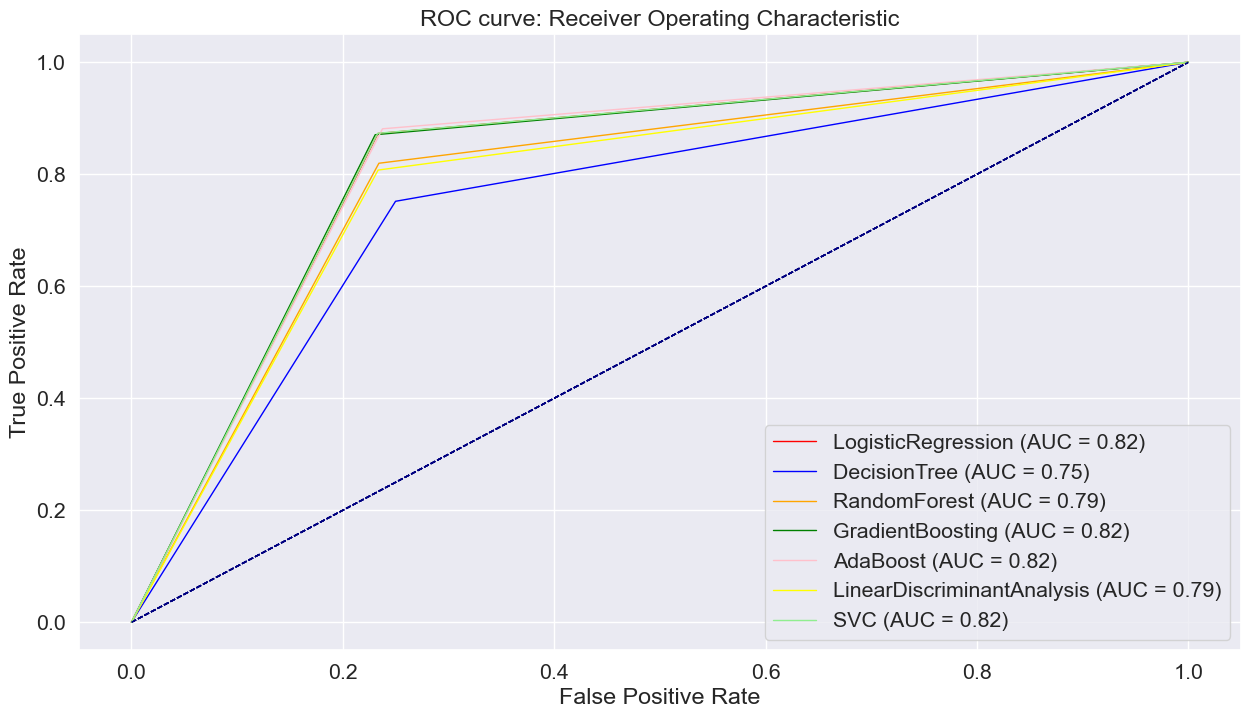

In [69]:
# ROC Curve: fornisce un altro metodo per valutare il modello
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [70]:

#optimal parameters for decision tree and random forest
LR_param={
    "penalty": ["l1", "l2", None],
    "max_iter": [30,50,100],
    "n_jobs": [1,3,7],
    "C": [0.3,0.7,1.0],
    "fit_intercept": [True]

}

DT_param = {
    "max_depth": [2,3,8,10],
    "max_features": [0.3,0.7,1],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10],
    "criterion": ["gini"]
}
RF_param = {
    "max_depth": [None],
    "max_features": [0.3,0.7,1],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10],
    "bootstrap": [False],
    "n_estimators": [100,300],
    "criterion": ["gini"]
}

LRgs=GridSearchCV(LogisticRegression(), param_grid=LR_param, cv =kfold, n_jobs=4, scoring="accuracy", verbose=True)
DTgs=GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv =kfold, n_jobs=4, scoring="accuracy", verbose=True)
RFgs=GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv =kfold, n_jobs=4, scoring="accuracy", verbose=True)

models= [LRgs,DTgs,RFgs]

gs_model = []
score= []

for model in models:
    model.fit(x_train,y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [73]:
#scores without GridSearch
print("score without GridSearchCV: ", round(cv_acc[0], 3), round(cv_acc[1],3),round(cv_acc[2],3))
#scores with GridSearch
print("score with GridSearchCV: ",round(score[0],3),round(score[1],3), round(score[2],3))


score without GridSearchCV:  0.91 1.0 1.0
score with GridSearchCV:  0.81 0.811 0.814


Text(0.5, 1.0, 'Correlation between models')

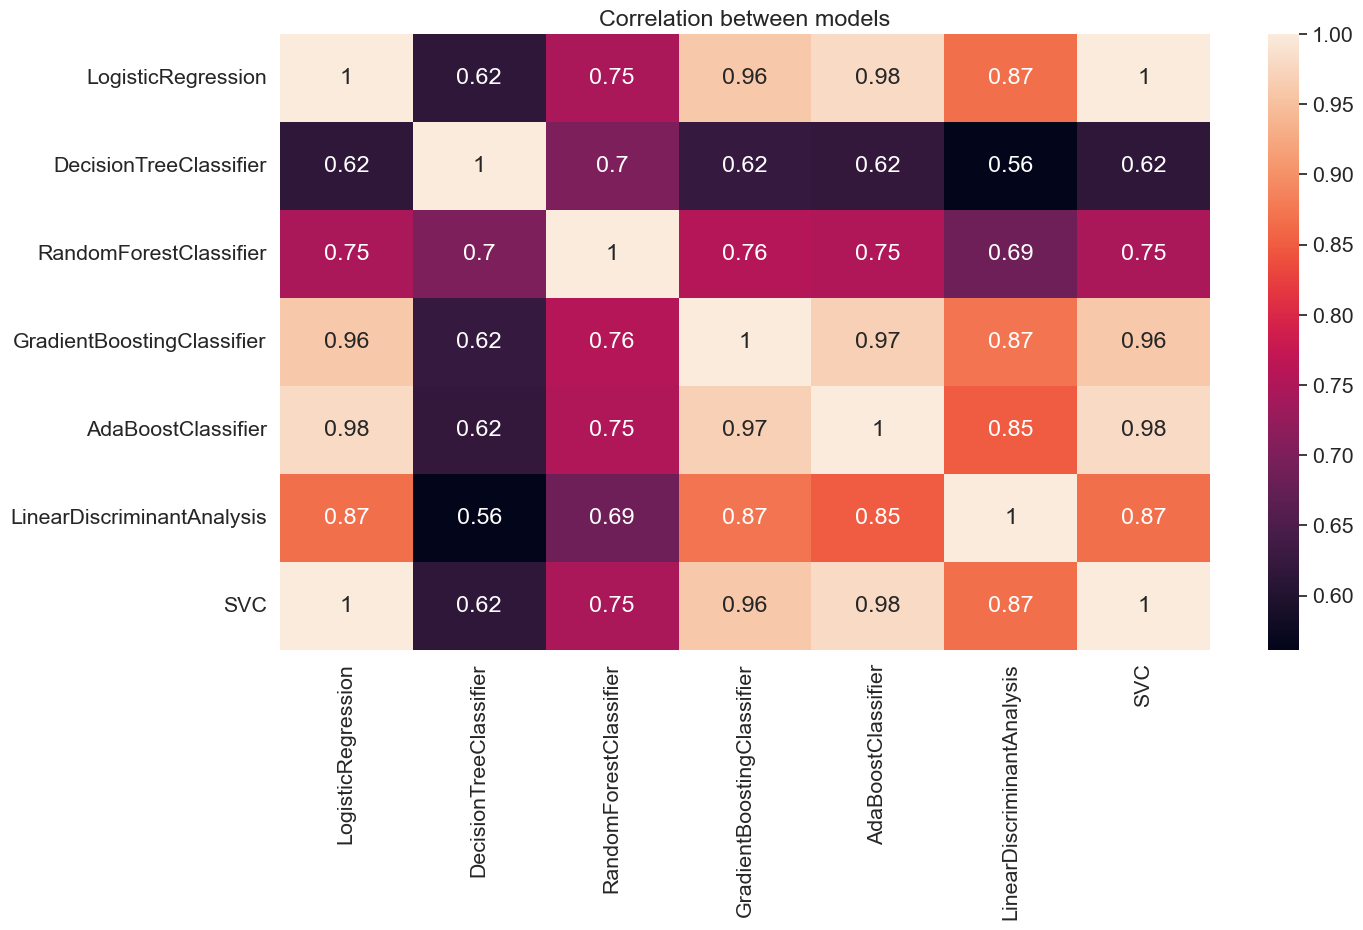

In [74]:


# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("HighImpact", axis=1).corr(),annot=True)
plt.title("Correlation between models")